In [2]:
import numpy as np
import rasterio
import os

file_list = os.listdir('경로')
file_list

# 반복문(length.file_list())
### target = 사전경로 + file_list[i]
### save = 사전경로 + file_list[i]+'r' +' '.tif'

dataset = rasterio.open(r'C:/Users/CES/FR_AP_36701090_340_FGT.tif')
save = r'C:/Users/CES/FR_AP_36701090_340_FGT_r.tif'

In [3]:
dataset.count

1

In [4]:
band1 = dataset.read(1)
print(len(band1))
print(np.shape(band1))
print(np.size(band1))

#print(band1)

512
(512, 512)
262144


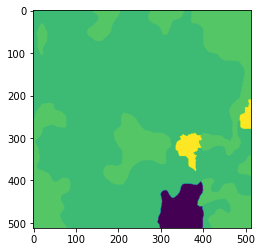

In [5]:
%matplotlib inline
from matplotlib import pyplot
pyplot.imshow(dataset.read(1))
pyplot.show()

In [6]:
for i in range(len(band1)):
    for j in range(len(band1)):
        if band1[i][j] == 110:
            band1[i][j] = 2
        elif band1[i][j] == 120:
            band1[i][j] = 2
        elif band1[i][j] == 130:
            band1[i][j] = 2
        elif band1[i][j] == 140:
            band1[i][j] = 1
        elif band1[i][j] == 190:
            band1[i][j] = 0
        else:
            band1[i][j] = 0
            
print(band1)

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


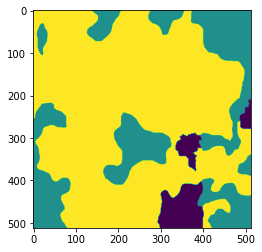

In [7]:
pyplot.imshow(band1)
pyplot.show()

In [8]:
profile = dataset.profile
profile.update(dtype = rasterio.uint8, count=1)

with rasterio.open(save, 'w', **profile) as r:
    r.write(band1, 1)